In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt

from hdf5storage import savemat
from hdf5storage import loadmat
import matplotlib.patches as mpatches
import matplotlib
import hickle

import sys
sys.path.append('../../src')

In [2]:
import evaluation.eval_rank as eval_rank
import evaluation.eval_utils as eval_utils

In [3]:
data_path = '../../data/opp8.hkl'
with open(data_path, 'r') as fin:
    data = hickle.load(fin)

test_gt = data['test_gt'][:,:,-1]

In [4]:
test_gt.shape

(119, 1024)

In [5]:
data_num_step = 1024

In [6]:
test_gt_idx_changes = []
for i in range(len(test_gt)):
    idx_changes = np.where(test_gt[i]==1)[0]
    test_gt_idx_changes.append(idx_changes)    

In [7]:
len(test_gt_idx_changes), test_gt_idx_changes[0]

(119, array([], dtype=int64))

In [8]:
CNN_Wm_8 = loadmat("../../poc/pocCNN_Wmultitask_8_opp"+'.mat')['poc']
NWN_Wm_8 = loadmat("../../poc/pocDWN_Wmultitask_8_opp"+'.mat')['poc']
RCNN_Wm_8 = loadmat("../../poc/pocRCNN_Wmultitask_8_opp"+'.mat')['poc']


In [9]:
cpd_val_CNN8, cpd_CNN8 = eval_rank.non_max_supression(CNN_Wm_8, window=5, data_num_step=data_num_step)
cpd_val_NWN8, cpd_NWN8 = eval_rank.non_max_supression(NWN_Wm_8, window=5, data_num_step=data_num_step)
cpd_val_RCNN8, cpd_RCNN8 = eval_rank.non_max_supression(RCNN_Wm_8, window=5, data_num_step=data_num_step)



In [10]:
def tolerance_auc(cpd_val, cpd, gt_mean_test, tolerance):
    out_put = []
    for t in tolerance:
        print t
        out = eval_rank.parallel_ranking(cpd_val, cpd, gt_mean_test, t)
        out_put.append(eval_utils.calc_auc(zip(out[0], out[1]), gt_mean_test))
        
    return out_put    

In [11]:
tolerance = [8, 16, 32, 64, 128, 256, 512]
tol_auc_CNN8 = tolerance_auc(cpd_val_CNN8, cpd_CNN8, test_gt_idx_changes, tolerance)
tol_auc_NWN8 = tolerance_auc(cpd_val_NWN8, cpd_NWN8, test_gt_idx_changes, tolerance)
tol_auc_RCNN8 = tolerance_auc(cpd_val_RCNN8, cpd_RCNN8, test_gt_idx_changes, tolerance)

8
1549
5.45350790024
16
1549
5.23963999748
32
1549
5.00006103516
64
1549
5.35895109177
128
1549
5.77199888229
256
1549
4.86627006531
512
1549
4.71210384369
8
1542
4.87884402275
16
1542
4.95831894875
32
1542
4.84993004799
64
1542
4.59323501587
128
1542
4.58318114281
256
1542
4.60067605972
512
1542
4.53983998299
8
1572
4.24395489693
16
1572
5.02293109894
32
1572
4.76588177681
64
1572
4.18538308144
128
1572
4.65492916107
256
1572
4.2047290802
512
1572
4.52352190018


In [12]:
#tol_auc_RCNN8 = tolerance_auc(cpd_val_RCNN8, cpd_RCNN8, test_gt_idx_changes, tolerance)

/data2/data/zebrahim/anaconda2/envs/tensorflow/lib/python2.7/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family [u'normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


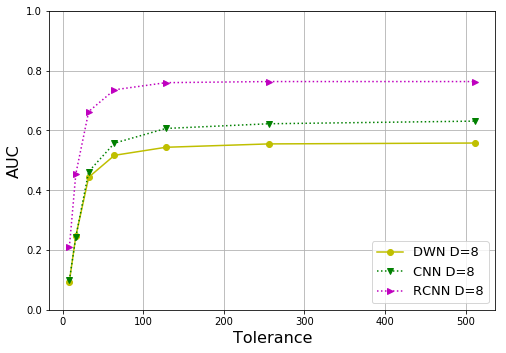

In [13]:
plt.figure(figsize=(8,5.5))
plt.plot(tolerance,tol_auc_NWN8,'-oy',label ='DWN D=8')
plt.plot(tolerance,tol_auc_CNN8,':vg',label ='CNN D=8')
plt.plot(tolerance,tol_auc_RCNN8,'>:m',label ='RCNN D=8')

font = {'family' : 'normal',
        'size'   : 15
         }

matplotlib.rc('font', **font)

plt.legend(loc='lower right', fontsize = 13)
plt.ylim([0,1], )
plt.grid()
plt.xlabel('Tolerance', fontsize = 16)
plt.ylabel('AUC', fontsize = 16)

# show the results
plt.show()

#save the results
#plt.savefig('../plot/plt1.png', bbox_inches = 'tight')

In [ ]:
1